In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import copy

class FillerGame:
    def __init__(self, width=10, height=10, colors=['R', 'G', 'B', 'Y', 'O', 'P']):
        self.width = width
        self.height = height
        self.colors = colors
        self.color_map = {'R': 'red', 'G': 'green', 'B': 'blue', 'Y': 'yellow', 'O': 'orange', 'P': 'purple'}
        self.board = np.array([[random.choice(colors) for _ in range(width)] for _ in range(height)])
        self.ensure_no_adjacent_matches()
        self.players = {1: {'score': 1, 'territory': [(height-1, 0)], 'color': self.board[-1, 0]},
                        2: {'score': 1, 'territory': [(0,width-1)], 'color': self.board[0, -1]}}
        self.current_player = 1
        self.display_board_matplotlib()

    def ensure_no_adjacent_matches(self):
        for i in range(self.height):
            for j in range(self.width):
                adjacent_colors = set()
                if i > 0:
                    adjacent_colors.add(self.board[i-1, j])
                if j > 0:
                    adjacent_colors.add(self.board[i, j-1])

                # Additional checks for the corners
                if (i, j) in [(0, 1), (1, 0), (self.height - 1, self.width - 2), (self.height - 2, self.width - 1),
                             (0, self.width - 2), (1, self.width - 1), (self.height - 1, 1), (self.height - 2, 0)]:
                    # Add the diagonal neighbor's color to the set
                    diagonal_i, diagonal_j = (1, 1) if i == 0 else (self.height - 2, self.width - 2)
                    adjacent_colors.add(self.board[diagonal_i, diagonal_j])

                available_colors = [c for c in self.colors if c not in adjacent_colors]
                self.board[i, j] = random.choice(available_colors)


    def play_turn(self, color, current_player, ai = False):
        if color not in self.colors:
            raise ValueError("Invalid color choice")

        opponent_color = self.players[3 - current_player]['color']
        if color == opponent_color:
            raise ValueError("Cannot choose the color that the opponent currently has")

        if color == self.players[current_player]['color']:
            raise ValueError("Cannot choose the color you currently have")


        player = self.players[self.current_player]
        new_territory = []

        for x, y in player['territory']:
            for dx, dy in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.height and 0 <= ny < self.width and self.board[nx, ny] == color:
                    new_territory.append((nx, ny))

        for x, y in player['territory']:
            self.board[x][y] = color
        player['territory'].extend(new_territory)
        player['territory']= list(set(player['territory']))
        player['score']  = len(player['territory'])
        player['color'] = color
        self.current_player = 3 - current_player  # Switch between player 1 and 2

        # Print scores
        player_1_score = self.players[1]['score']
        player_2_score = self.players[2]['score']

        if not ai:
            print(f"Player 1 score: {player_1_score}")
            print(f"Player 2 score: {player_2_score}")
            self.display_board_matplotlib()

        end, player = self.check_end()

        if end and not ai:
            print(f"Player {player}, you have won!")

    def display_board_matplotlib(self):
        fig, ax = plt.subplots()

        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])

        for i in range(self.height):
            for j in range(self.width):
                color = self.color_map[self.board[i, j]]
                rect = plt.Rectangle([j, i], 1, 1, color=color)
                ax.add_patch(rect)

        ax.set_xlim(0, self.width)
        ax.set_ylim(0, self.height)
        ax.invert_yaxis()
        plt.show()


    def copy_game(self):
        return copy.deepcopy(self)

    def check_end(self):
        total_squares = self.width * self.height
        player_1_score = self.players[1]['score']
        player_2_score = self.players[2]['score']

        if player_1_score + player_2_score == total_squares:
            if player_1_score > player_2_score:
                return True, 1
            else:
                return True, 2
        return False, None  # No winner yet

    def evaluate_board(self):
        # Example evaluation function
        # Returns the difference in scores between player 2 and player 1
        return self.players[2]['score'] - self.players[1]['score']

    def minimax(self, depth, alpha, beta, maximizingPlayer):
        if depth == 0 or self.check_end()[0]:
            return self.evaluate_board()

        if maximizingPlayer:
            maxEval = float('-inf')
            for color in self.colors:
                if color != self.players[1]['color'] and color != self.players[2]['color']:
                    game_copy = self.copy_game()
                    game_copy.play_turn(color, 2, ai=True)  # Simulate move for AI in copy
                    eval = game_copy.minimax(depth - 1, alpha, beta, False)
                    maxEval = max(maxEval, eval)
                    alpha = max(alpha, eval)
                    if beta <= alpha:
                        break
            return maxEval
        else:
            minEval = float('inf')
            for color in self.colors:
                if color != self.players[1]['color'] and color != self.players[2]['color']:
                    game_copy = self.copy_game()
                    game_copy.play_turn(color, 1, ai=True)  # Simulate move for opponent in copy
                    eval = game_copy.minimax(depth - 1, alpha, beta, True)
                    minEval = min(minEval, eval)
                    beta = min(beta, eval)
                    if beta <= alpha:
                        break
            return minEval

    def find_best_move(self):
        best_score = float('-inf')
        best_move = None
        for color in self.colors:
            if color != self.players[1]['color'] and color != self.players[2]['color']:
                game_copy = self.copy_game()
                game_copy.play_turn(color, 2, ai=True)  # Simulate move for AI in copy
                score = game_copy.minimax(3, float('-inf'), float('inf'), False)
                if score > best_score:
                    best_score = score
                    best_move = color
        return best_move

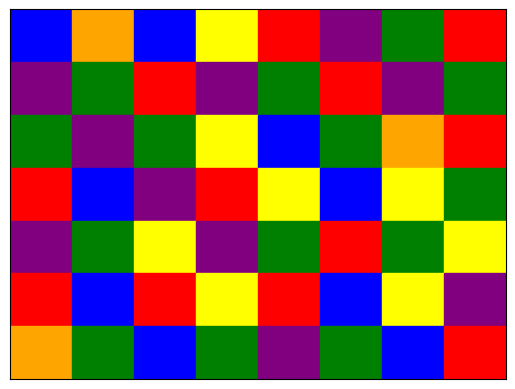

In [ ]:
# from filler import FillerGame

# Example usage
game = FillerGame(width=8, height=7)


Player 1 score: 2
Player 2 score: 1


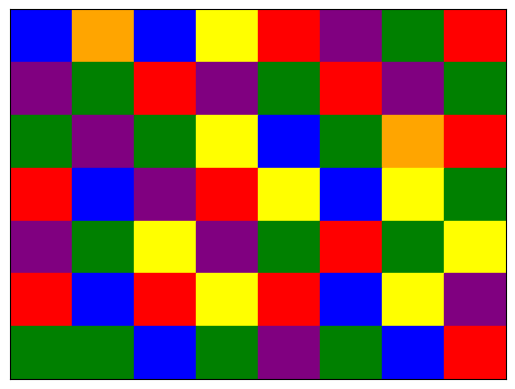

B
Player 1 score: 2
Player 2 score: 1


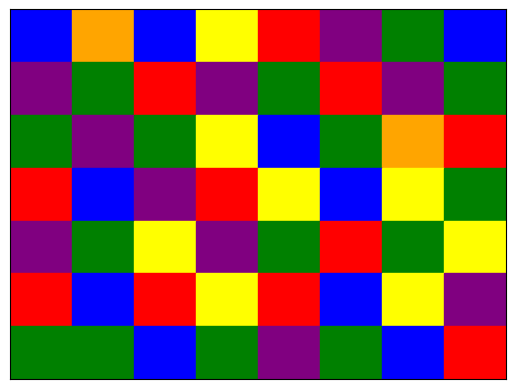

In [ ]:
game.play_turn('G', 1)
# AI (Player 2) finds the best move
best_move_for_ai = game.find_best_move()
print(best_move_for_ai)
game.play_turn(best_move_for_ai, 2)

Player 1 score: 3
Player 2 score: 1


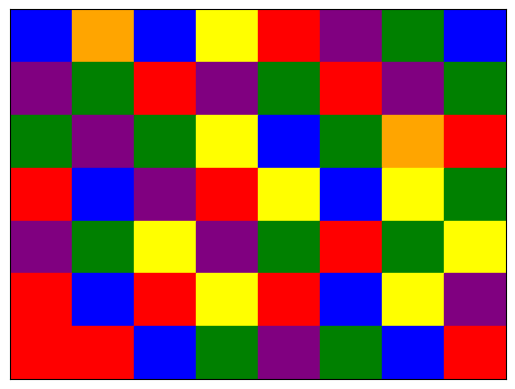

G
Player 1 score: 3
Player 2 score: 3


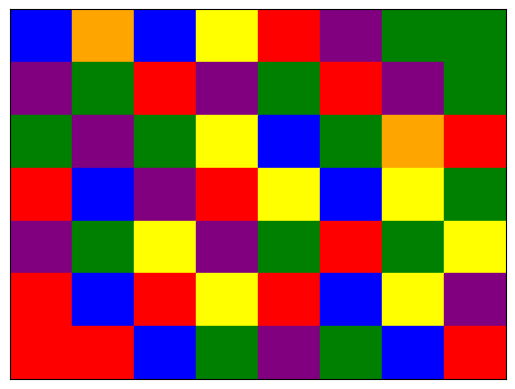

In [ ]:
game.play_turn('R', 1)
# AI (Player 2) finds the best move
best_move_for_ai = game.find_best_move()
print(best_move_for_ai)
game.play_turn(best_move_for_ai, 2)

Player 1 score: 5
Player 2 score: 3


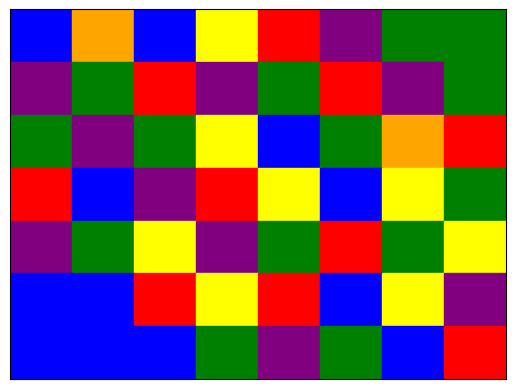

P
Player 1 score: 5
Player 2 score: 5


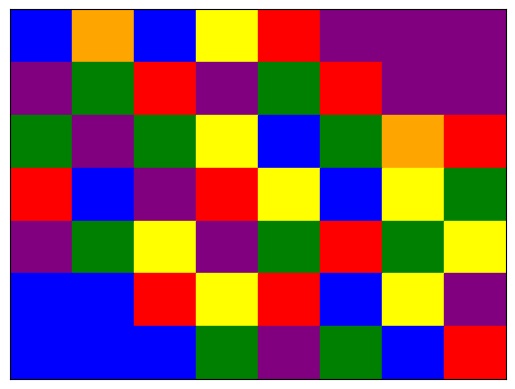

In [ ]:
game.play_turn('B', 1)
# AI (Player 2) finds the best move
best_move_for_ai = game.find_best_move()
print(best_move_for_ai)
game.play_turn(best_move_for_ai, 2)

Player 1 score: 7
Player 2 score: 5


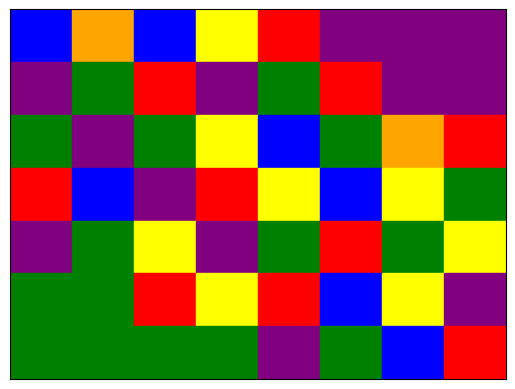

R
Player 1 score: 7
Player 2 score: 8


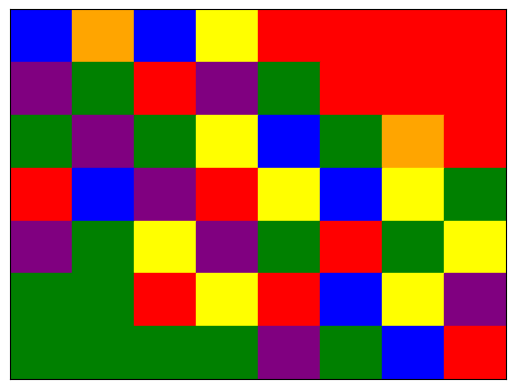

In [ ]:
game.play_turn('G', 1)
# AI (Player 2) finds the best move
best_move_for_ai = game.find_best_move()
print(best_move_for_ai)
game.play_turn(best_move_for_ai, 2)

Player 1 score: 9
Player 2 score: 8


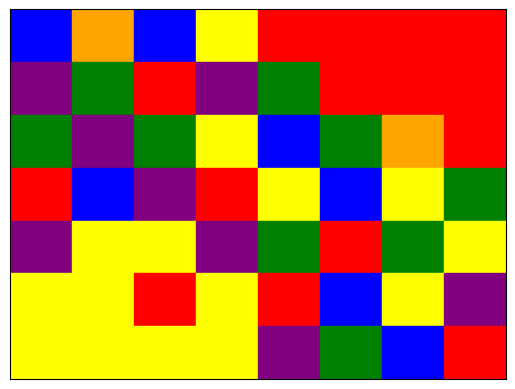

G
Player 1 score: 9
Player 2 score: 11


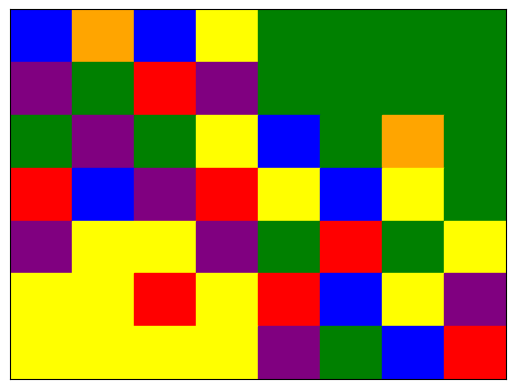

In [ ]:
game.play_turn('Y', 1)
# AI (Player 2) finds the best move
best_move_for_ai = game.find_best_move()
print(best_move_for_ai)
game.play_turn(best_move_for_ai, 2)

Player 1 score: 13
Player 2 score: 11


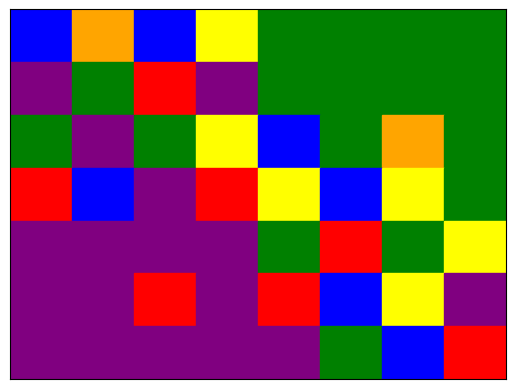

B
Player 1 score: 13
Player 2 score: 13


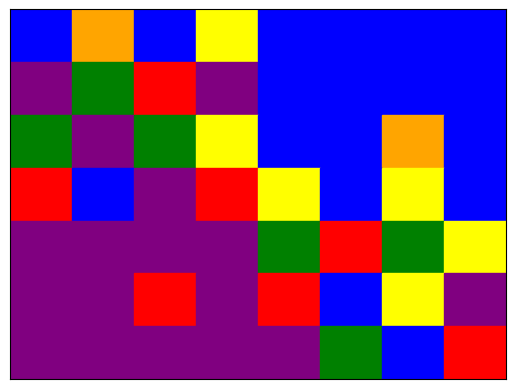

In [ ]:
game.play_turn('P', 1)
# AI (Player 2) finds the best move
best_move_for_ai = game.find_best_move()
print(best_move_for_ai)
game.play_turn(best_move_for_ai, 2)

Player 1 score: 16
Player 2 score: 13


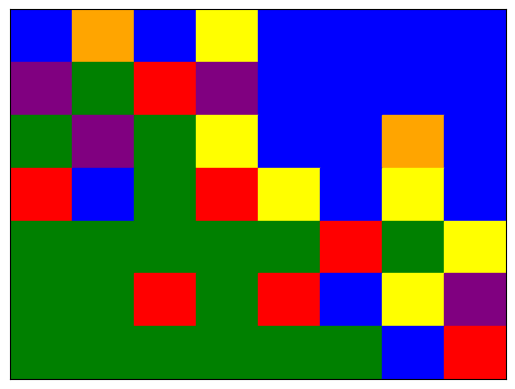

Y
Player 1 score: 16
Player 2 score: 18


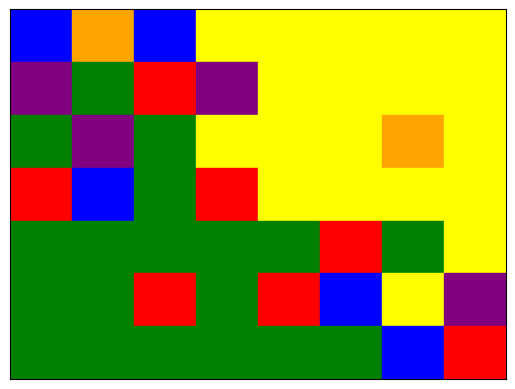

In [ ]:
game.play_turn('G', 1)
# AI (Player 2) finds the best move
best_move_for_ai = game.find_best_move()
print(best_move_for_ai)
game.play_turn(best_move_for_ai, 2)

Player 1 score: 22
Player 2 score: 18


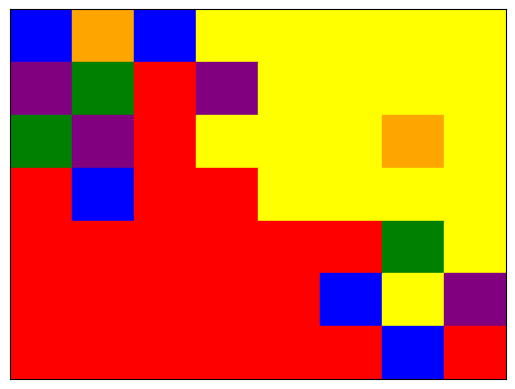

P
Player 1 score: 22
Player 2 score: 20


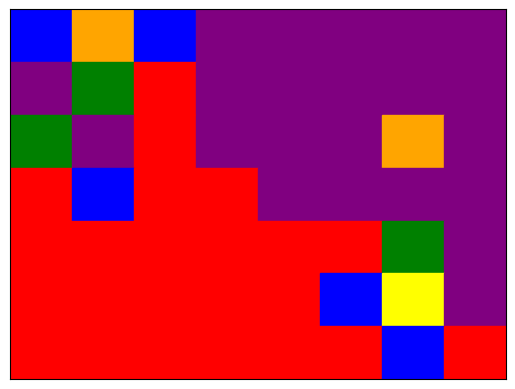

In [ ]:
game.play_turn('R', 1)
# AI (Player 2) finds the best move
best_move_for_ai = game.find_best_move()
print(best_move_for_ai)
game.play_turn(best_move_for_ai, 2)

Player 1 score: 25
Player 2 score: 20


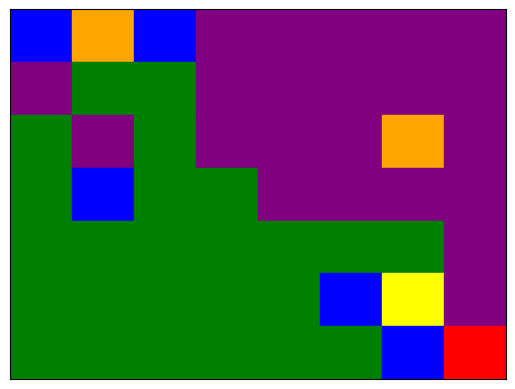

B
Player 1 score: 25
Player 2 score: 21


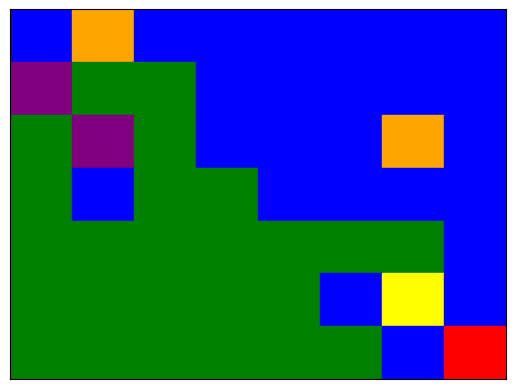

In [ ]:
game.play_turn('G', 1)
best_move_for_ai = game.find_best_move()
print(best_move_for_ai)
game.play_turn(best_move_for_ai, 2)

Player 1 score: 27
Player 2 score: 21


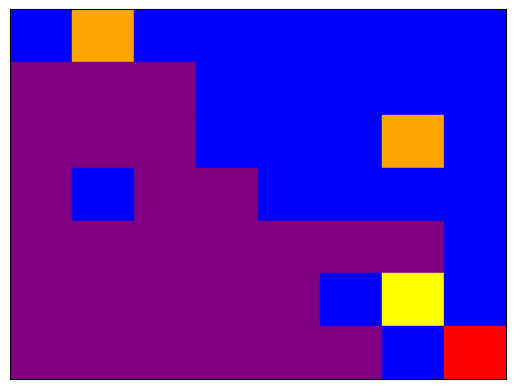

R
Player 1 score: 27
Player 2 score: 22


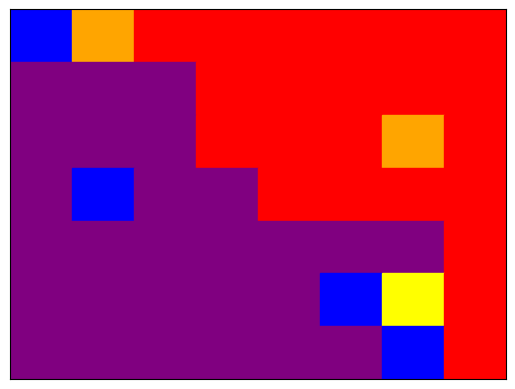

In [ ]:
game.play_turn('P', 1)
best_move_for_ai = game.find_best_move()
print(best_move_for_ai)
game.play_turn(best_move_for_ai, 2)

Player 1 score: 31
Player 2 score: 22


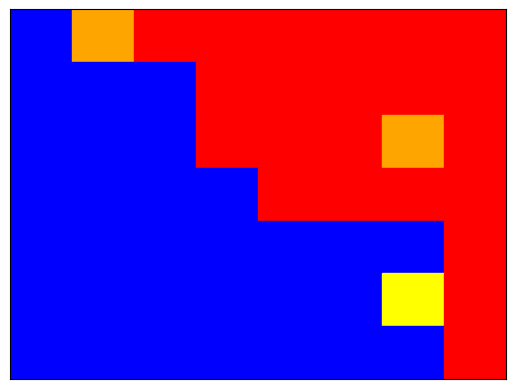

O
Player 1 score: 31
Player 2 score: 24


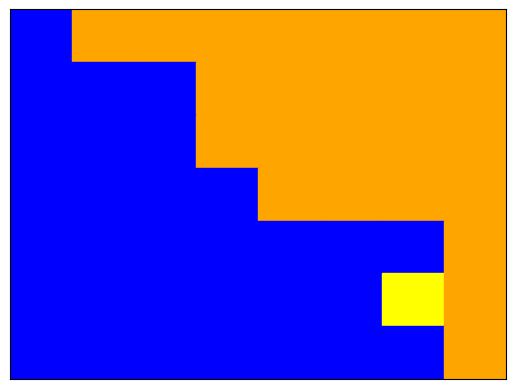

In [ ]:
game.play_turn('B', 1)
best_move_for_ai = game.find_best_move()
print(best_move_for_ai)
game.play_turn(best_move_for_ai, 2)

Player 1 score: 32
Player 2 score: 24


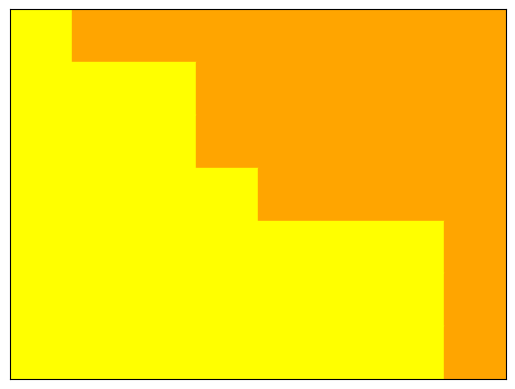

Player 1, you have won!


In [ ]:
game.play_turn('Y', 1)

Player 1 score: 28
Player 2 score: 26


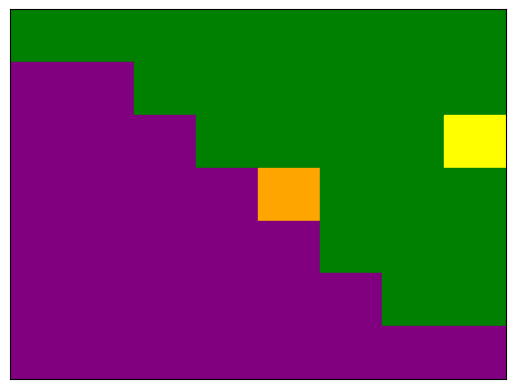

O
Player 1 score: 28
Player 2 score: 27


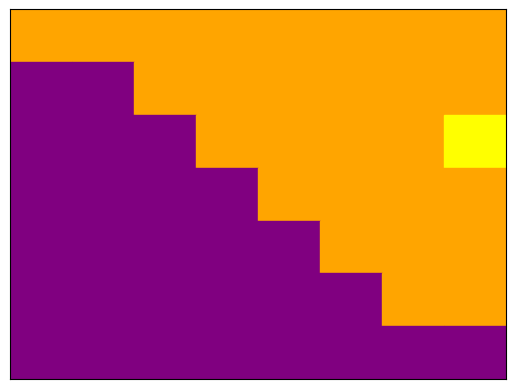

In [ ]:
game.play_turn('P', 1)
best_move_for_ai = game.find_best_move()
print(best_move_for_ai)
game.play_turn(best_move_for_ai, 2)

Player 1 score: 28
Player 2 score: 27


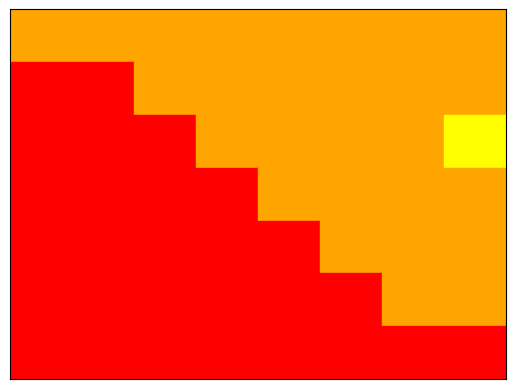

Y
Player 1 score: 28
Player 2 score: 28


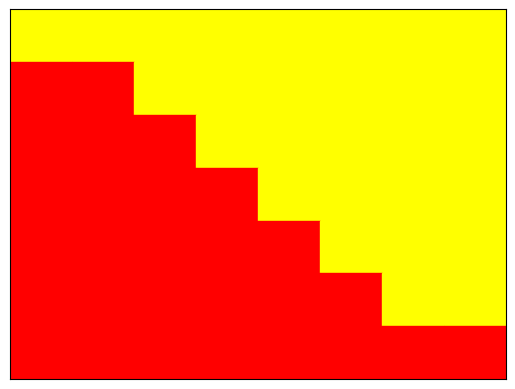

Player 2, you have won!


In [ ]:
game.play_turn('R', 1)
best_move_for_ai = game.find_best_move()
print(best_move_for_ai)
game.play_turn(best_move_for_ai, 2)